In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [15]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [44]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(cecks=50)

In [45]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [52]:
matches = flann.knnMatch(des1,des2,k=2)

In [54]:
# dodawanie maski
matchesMask = [[0,0] for i in range(len(matches))]

In [61]:
# dobieranie par najlepszych dopasowań
good = []

# i dla indeksów + enumerate() do ich pozyskania
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
        # dla maski już nie potrzebne
        # ale przydatne do porównania wyników
        good.append([match1])

In [62]:
len(good)

78

In [63]:
len(matches)

1500

In [64]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

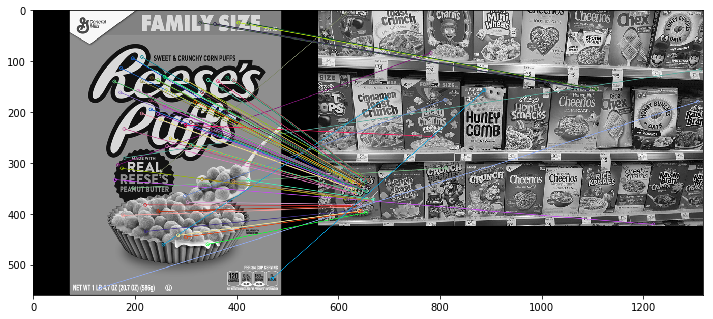

In [65]:
display(flann_matches)

In [71]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)

In [72]:
flann_matches_mask = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

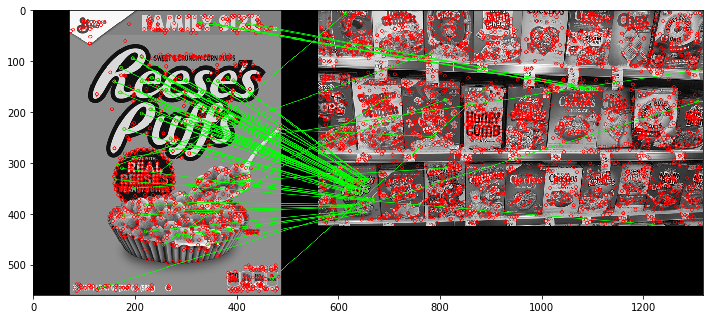

In [73]:
display(flann_matches_mask)